# Analysis and Visualization

## Importing libraries and scripts

In [1]:
from viz_utils import *
%matplotlib inline
pd.options.mode.chained_assignment = None

Reading config file...
Config file read successfully
Initializing variables... 
Variables successfully initialized


## NYC map, Manhattan and John Fitzgerald Kennedy International Airport areas

Below you may see a map of NYC split by its districts. 
Moreover, Manhattan and JFK airport are highlighted with red and blue dotted lines correspondingly

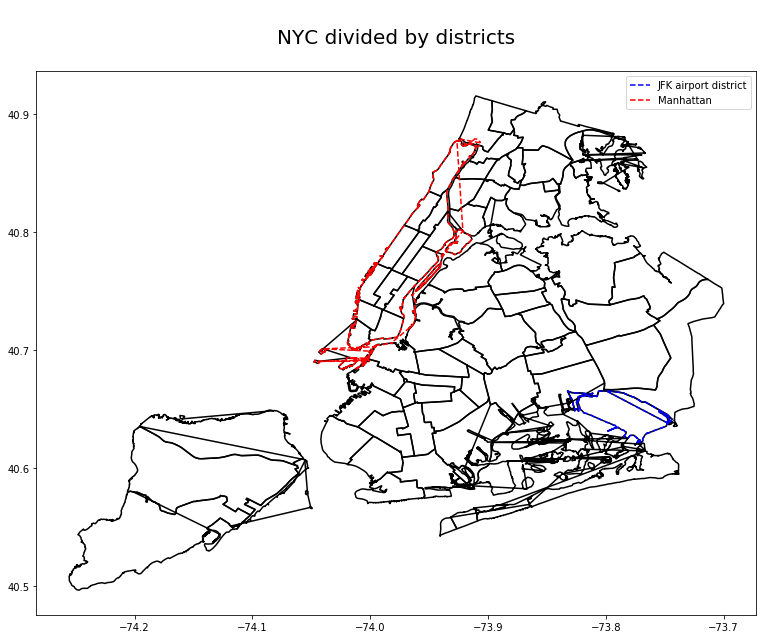

In [2]:
plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_aspect('equal')
for shape in list(cd.iterShapes()):
    plot(shape)
plot(cd.shape(35), 'JFK')
plot(bb.shape(0), 'MN')
plt.title('\nNYC divided by districts\n', fontsize=20)
plt.legend()
plt.show()

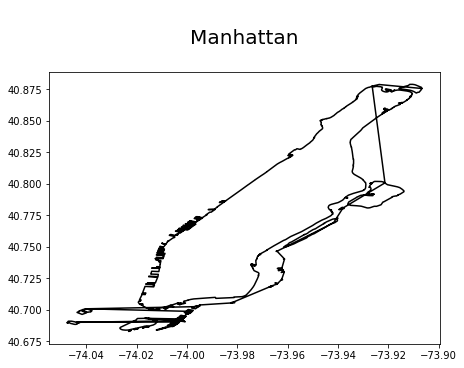

In [3]:
plt.figure(figsize=(7,5))
plot(bb.shape(0))
plt.title('\nManhattan\n', fontsize=20)
plt.show()

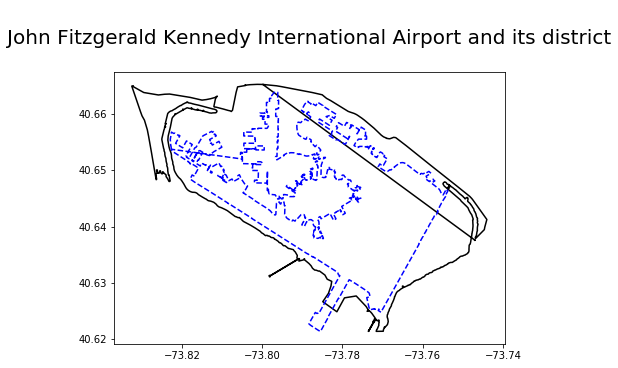

In [4]:
plt.figure(figsize=(7,5))
plot(cd.shape(35))
plot(airports.shape(1), 'JFK')
plt.title('\nJohn Fitzgerald Kennedy International Airport and its district\n', fontsize=20)
plt.show()

## Visualizing filtered rides

In this section you may find visualizations of all the filtered rides 

In [5]:
PU_DO_ids = pd.DataFrame()
PU_DO_lls = pd.DataFrame()

lls_path = os.path.join(PATH_TMP, 'lat_lon.csv')
ids_path = os.path.join(PATH_TMP, 'ids.csv')

if os.path.exists(lls_path):
    PU_DO_lls = pd.read_csv(lls_path, parse_dates=[0], usecols=['DATE', 'PU_lon', 'PU_lat', 'DO_lon', 'DO_lat'])
    PU_DO_ids = pd.read_csv(ids_path, parse_dates=[0], usecols=['DATE', 'PU_ID', 'DO_ID'])
else:
    for filename in os.listdir(PATH_RESULT):
        df_loc = get_PU_DO(filename)
        if len(df_loc.columns) == 5:
            PU_DO_lls = PU_DO_lls.append(df_loc)
        else:
            PU_DO_ids = PU_DO_ids.append(df_loc)
    PU_DO_lls.to_csv(lls_path)
    PU_DO_ids.to_csv(ids_path)


Number of rides from Manhattan to JFK International Airport = 8085517


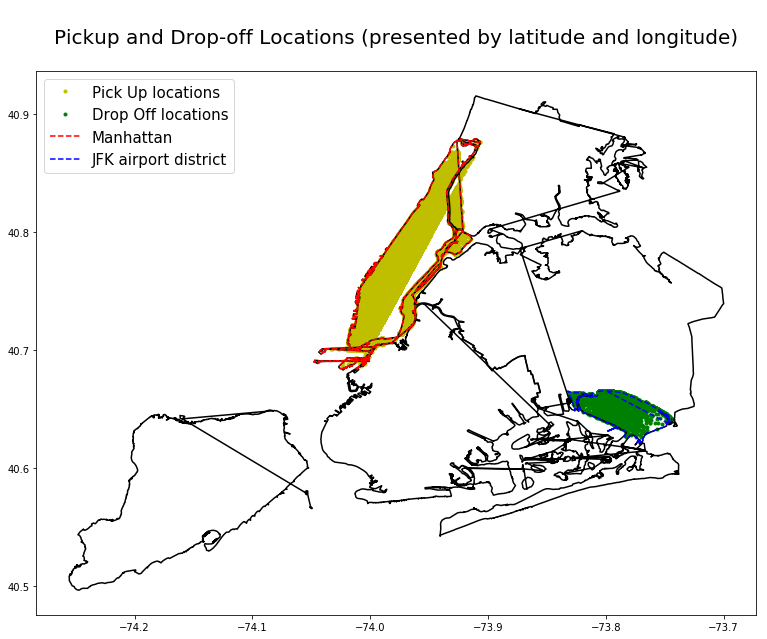

In [6]:
print('\nNumber of rides from Manhattan to JFK International Airport = {}'.format(len(PU_DO_lls) + len(PU_DO_ids)))
plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_aspect('equal')
plt.plot(PU_DO_lls['PU_lon'], PU_DO_lls['PU_lat'], '.', color='y', label = 'Pick Up locations')
plt.plot(PU_DO_lls['DO_lon'], PU_DO_lls['DO_lat'], '.', color='g', label = 'Drop Off locations')
for shape in list(bb.iterShapes()):
    plot(shape)
plot(bb.shape(0), 'MN')
plot(cd.shape(35), 'JFK')
plt.title('\nPickup and Drop-off Locations (presented by latitude and longitude)\n', fontsize=20)
plt.legend(fontsize=15)
plt.show()

## Correlation between the number of rides within a day and the weather, and more specifically the precipitation

To analyze this correlaton, first we need to calculate number of daily taxi rides from Manhattan to JFK airport

In [7]:
fhv_stats = pd.DataFrame()
green_stats = pd.DataFrame()
yellow_stats = pd.DataFrame()

fhv_path = os.path.join(PATH_TMP, 'fhv_rides.csv')
green_path = os.path.join(PATH_TMP, 'green_rides.csv')
yellow_path = os.path.join(PATH_TMP, 'yellow_rides.csv')

if os.path.exists(fhv_path):
    fhv_stats = pd.read_csv(fhv_path, index_col=0, parse_dates=[1])
    green_stats = pd.read_csv(green_path, index_col=0, parse_dates=[1])
    yellow_stats = pd.read_csv(yellow_path, index_col=0, parse_dates=[1])
else:
    for file in os.listdir(PATH_RESULT):
        tmp_stats = rides_per_day(file)
        if 'fhv' in file:
            fhv_stats = fhv_stats.append(tmp_stats)
        elif 'green' in file:
            green_stats = green_stats.append(tmp_stats)
        elif 'yellow' in file:
            yellow_stats = yellow_stats.append(tmp_stats)
    fhv_stats.to_csv(fhv_path)
    green_stats.to_csv(green_path)
    yellow_stats.to_csv(yellow_path)

In [8]:
fhv_rides = fhv_stats.groupby('PickUp_datetime').sum()
print('Number of observed days for FHV taxi :: {}  -  from {} to {}'
      .format(len(fhv_rides), fhv_rides.index[0].date(), fhv_rides.index[-1].date()))
green_rides = green_stats.groupby('PickUp_datetime').sum()
print('Number of observed days for Green taxi :: {}  -  from {} to {}'
      .format(len(green_rides), green_rides.index[0].date(), green_rides.index[-1].date()))
yellow_rides = yellow_stats.groupby('PickUp_datetime').sum()
print('Number of observed days for Yellow taxi :: {}  -  from {} to {}'
      .format(len(yellow_rides), yellow_rides.index[0].date(), yellow_rides.index[-1].date()))
all_rides = pd.concat([fhv_rides, green_rides, yellow_rides]).groupby('PickUp_datetime').sum()

Number of observed days for FHV taxi :: 224  -  from 2017-03-01 to 2017-12-31
Number of observed days for Green taxi :: 1593  -  from 2013-08-09 to 2017-12-31
Number of observed days for Yellow taxi :: 3287  -  from 2009-01-01 to 2017-12-31


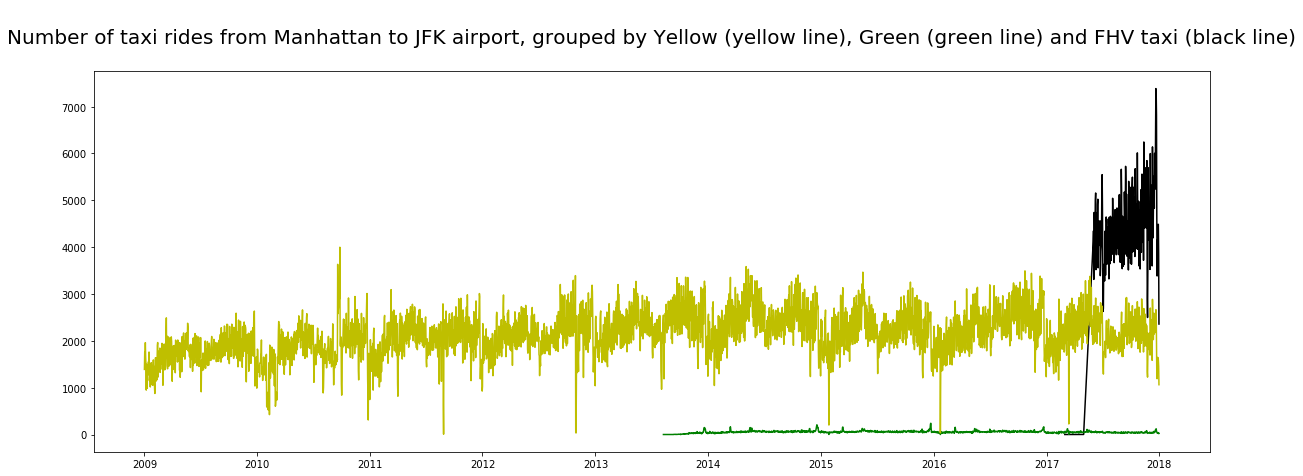

In [9]:
plt.figure(figsize=(20,7))
ax = plt.axes()
plt.plot(fhv_rides['counts'], color='k')
plt.plot(green_rides['counts'], color='g')
plt.plot(yellow_rides['counts'], color='y')
plt.title('\nNumber of taxi rides from Manhattan to JFK airport, grouped by Yellow (yellow line), Green (green line) and FHV taxi (black line)\n', fontsize=20)
plt.show()

Downloading of weather-related dataset, with meteorological measurements from a National Climatic Data Center weather station located in Central Park

In [10]:
noaa = pd.read_csv('noaa.csv', parse_dates=['DATE'])

### Average wind speed

The below chart shows a slight downward trend, meaning that wind speed has a considerable negative impact on daily taxi rides from Manhattan to JFK airport 

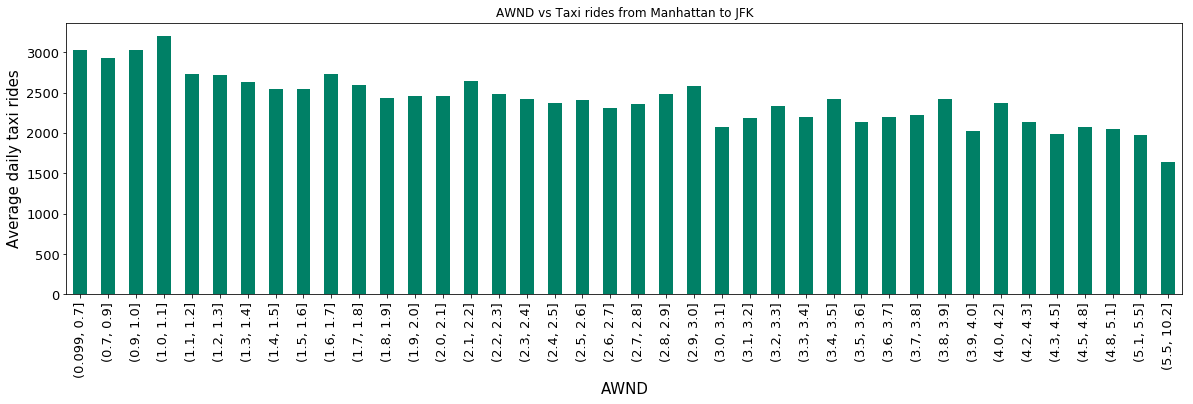

In [11]:
_ = plot_by_lvl(all_rides, noaa, c='AWND')

### Snowfall

The below chart shows a strong downward trend, meaning that snowfall has an enormous negative impact on daily taxi rides from Manhattan to JFK airport 

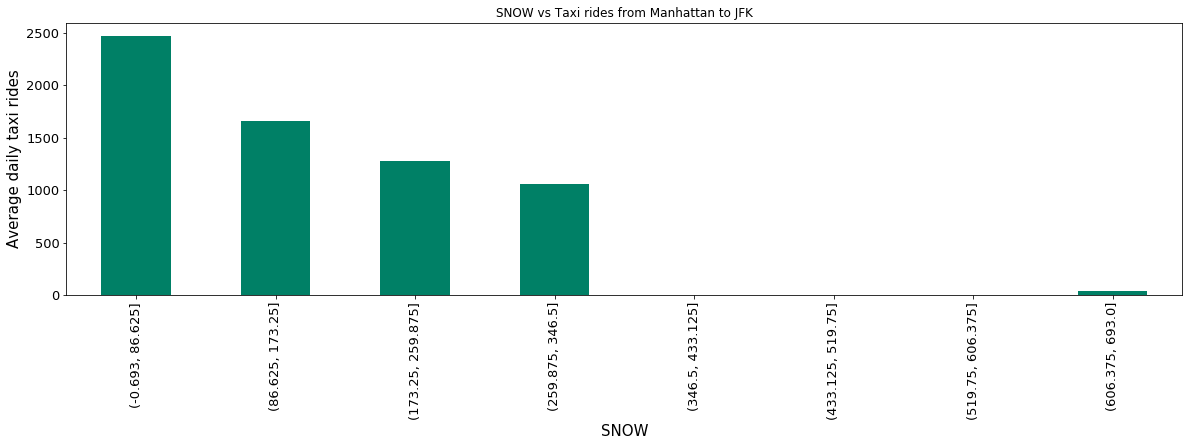

In [12]:
_ = plot_by_lvl(all_rides, noaa, c='SNOW', bins=8)

### Snow depth

The below bar chart illustrates how snow depth level affects the number of daily taxi rides.

As it may be seen from the chart, the deeper snow the less taxi rides from Manhattan to JFK airport

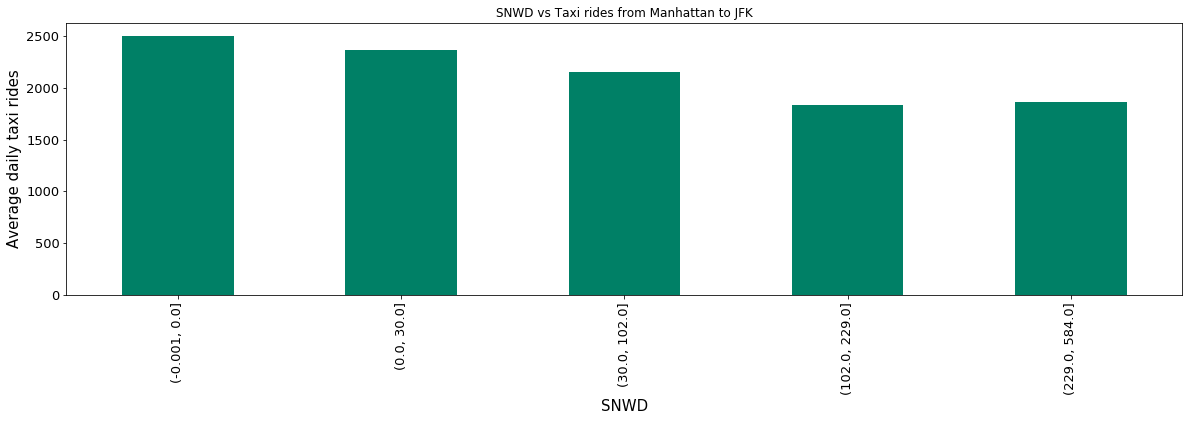

In [13]:
_ = plot_by_lvl(all_rides, noaa, c='SNWD')

### Precipitation

The below bar chart deals with how precipitation level affects the number of daily taxi rides.

The most left strip shows an average daily number of taxi rides from Manhattan to JFK when there is NO precipitation. The more to the right the more precipitation.

As we may see there is no strong correlation between the number of rides within a day and the precipitation level. However, we can observe a very slight downward trend, when the level of precipitation is more than ~18

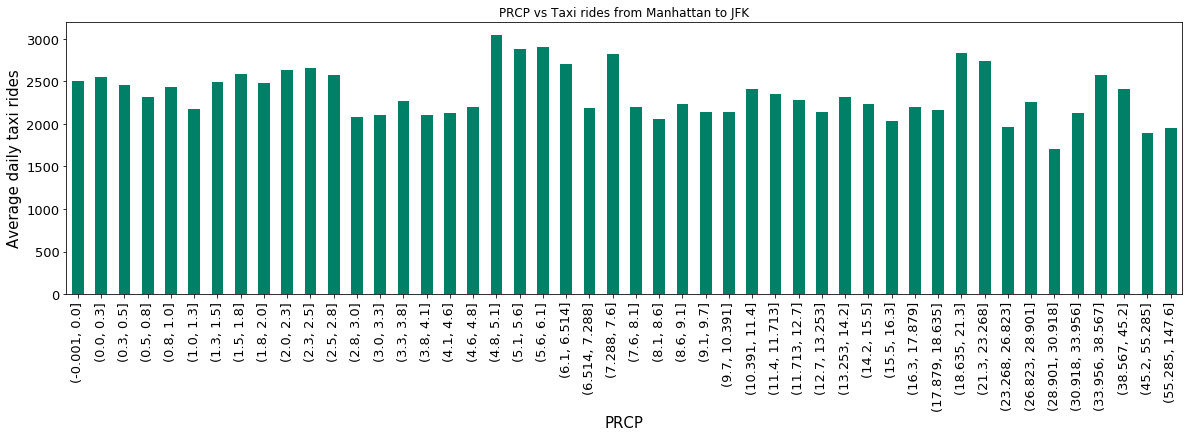

In [14]:
df = plot_by_lvl(all_rides, noaa)

#### Let's look at yellow taxi rides only (which has the longest historical data)

As we may observe, there is still no correlation

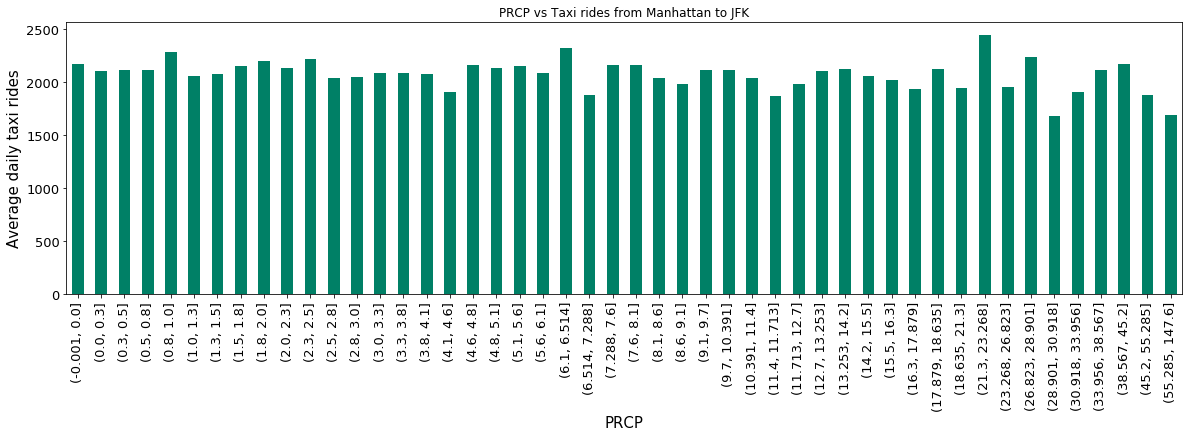

In [18]:
_ = plot_by_lvl(yellow_rides, noaa)

Below you may see the first 5 days, when there were the smallest number of taxi rides from Manhattan to JFK airport (in fact, these days coincide with the days of natural disasters)

In [15]:
df.sort_values(by=['counts']).head()

,DATE,counts,PRCP,level
969,2011-08-28,8,101.3,"(55.285, 147.6]"
1398,2012-10-30,33,6.9,"(6.514, 7.288]"
2578,2016-01-23,37,58.7,"(55.285, 147.6]"
1397,2012-10-29,47,17.0,"(16.3, 17.879]"
2217,2015-01-27,205,9.1,"(8.6, 9.1]"


Below you may see the first 5 days, when there were the highest level of precipitation

In [16]:
df.sort_values(by=['PRCP'], ascending=False).head()

,DATE,counts,PRCP,level
955,2011-08-14,1078,147.6,"(55.285, 147.6]"
1945,2014-04-30,2186,126.2,"(55.285, 147.6]"
1618,2013-06-07,2538,105.7,"(55.285, 147.6]"
969,2011-08-28,8,101.3,"(55.285, 147.6]"
436,2010-03-13,1518,98.0,"(55.285, 147.6]"


---------------------------------------------------

# Visualization of the filtered rides grouped by precipitation levels

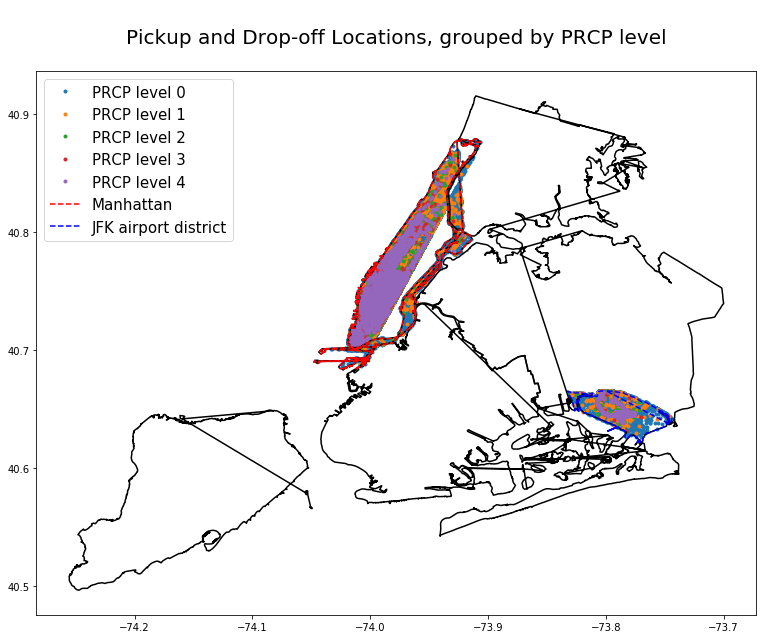

In [20]:
vis_rides_by_prcp(PU_DO_lls, 5, all_rides, noaa)